# 6.2 Exploring Relationships

## Table of contents:
### 1.Importing Libraries
### 2. Importing Data
### 3. Creating a Subset
### 4. Investigating relationships between variables
#### 4.1 Correlation Matrix
#### 4.2 Correlation heatmap
#### 4.3 Scatterplots
##### 4.3.1 population and gdp
##### 4.3.2  population and total co2 emissions
##### 4.3.3 population and primary energy consumption
##### 4.3.4 gdp and total co2 emissions
##### 4.3.5 gdp and primary energy consumption
##### 4.3.6 total co2 emissions and primary energy consumption
##### 4.3.7 co2 emissions per capita and energy consumption per capita
##### 4.3.8 co2 per gdp and energy per gdp
##### 4.3.9 energy consumption per capita and cement_co2 per capita
##### 4.3.10 co2_per_gdp and coal_co2_per_capita
##### 4.3.11 energy consumption per capita and coal_co2 per capita
##### 4.3.12 energy consumption per capita and flaring co2 per capita
##### 4.3.13 energy consumption per capita and gas_co2 per capita
##### 4.3.14 energy consumption per capita and oil_co2 per capita
##### 4.3.15 Summary results scatterplots
#### 4.4 Pair Plots
#### 4.5 Categorical Plots
##### 4.5.1 Create a categorical variable for total co2 emissions 
##### 4.5.2 Create a categorical variable for co2 emissions per capita
### 5. Key Questions
### 6. Hypothesis
### 7. Saving Charts

# 1. Importing Libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Check matplotlib version

matplotlib.__version__

'3.5.2'

In [3]:
# Ensure charts are displayed without having to call them specifically

%matplotlib inline

# 2. Importing Data

In [4]:
# Create a path to the root directory for this project

path = r'C:\Users\osoty\Desktop\CareerFoundry Data Analytics\Data Immersion\Achievement 6\Global CO2 Emissions Analysis'

In [5]:
# Import the dataframe

df_co2_recent = pd.read_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'emissions_clean_recent.pkl'))

In [6]:
# Print the first 5 rows

df_co2_recent.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_coal_co2,share_global_cumulative_cement_co2,share_global_cumulative_co2,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_oil_co2,share_global_flaring_co2,share_global_gas_co2,share_global_oil_co2
162,Afghanistan,2012,AFG,30466484.0,5.916690e+10,0.03,0.0,10.04,-1.80,-15.23,...,0.02,0.01,0.01,0.0,0.04,0.01,0.02,0.0,0.0,0.06
163,Afghanistan,2013,AFG,31541216.0,6.299370e+10,0.04,0.0,9.25,-0.78,-7.82,...,0.02,0.01,0.01,0.0,0.04,0.01,0.02,0.0,0.0,0.05
164,Afghanistan,2014,AFG,32716214.0,6.434611e+10,0.03,0.0,9.17,-0.08,-0.87,...,0.02,0.01,0.01,0.0,0.04,0.01,0.02,0.0,0.0,0.04
165,Afghanistan,2015,AFG,33753500.0,6.278339e+10,0.04,0.0,9.79,0.62,6.77,...,0.02,0.01,0.01,0.0,0.04,0.01,0.02,0.0,0.0,0.06
166,Afghanistan,2016,AFG,34636212.0,6.429743e+10,0.08,0.0,9.07,-0.72,-7.39,...,0.02,0.01,0.01,0.0,0.04,0.01,0.02,0.0,0.0,0.05


### The index is the same as the original dataframe (before subsetting).

In [7]:
# Reset the index

df_co2_recent = df_co2_recent.reset_index(drop = True)

In [8]:
# Show all the columns in the dataframe

pd.set_option('display.max_columns', None)

In [9]:
# Print the first 5 rows again

df_co2_recent.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_per_capita,co2_per_gdp,coal_co2,coal_co2_per_capita,cumulative_cement_co2,cumulative_co2,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_oil_co2,energy_per_capita,energy_per_gdp,flaring_co2,flaring_co2_per_capita,gas_co2,gas_co2_per_capita,oil_co2,oil_co2_per_capita,primary_energy_consumption,share_global_cement_co2,share_global_co2,share_global_coal_co2,share_global_cumulative_cement_co2,share_global_cumulative_co2,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_oil_co2,share_global_flaring_co2,share_global_gas_co2,share_global_oil_co2
0,Afghanistan,2012,AFG,30466484.0,5.916690e+10,0.03,0.0,10.04,-1.80,-15.23,0.33,0.17,3.12,0.10,2.12,125.39,25.32,0.0,17.77,74.22,1419.91,0.73,0.0,0.0,0.31,0.01,6.57,0.22,43.26,0.0,0.03,0.02,0.01,0.01,0.0,0.04,0.01,0.02,0.0,0.0,0.06
1,Afghanistan,2013,AFG,31541216.0,6.299370e+10,0.04,0.0,9.25,-0.78,-7.82,0.29,0.15,3.33,0.10,2.16,134.64,28.64,0.0,18.07,79.82,1156.86,0.58,0.0,0.0,0.30,0.01,5.59,0.18,36.49,0.0,0.03,0.02,0.01,0.01,0.0,0.04,0.01,0.02,0.0,0.0,0.05
2,Afghanistan,2014,AFG,32716214.0,6.434611e+10,0.03,0.0,9.17,-0.08,-0.87,0.28,0.14,3.71,0.11,2.19,143.81,32.35,0.0,18.34,84.98,1024.02,0.52,0.0,0.0,0.27,0.01,5.16,0.16,33.50,0.0,0.03,0.02,0.01,0.01,0.0,0.04,0.01,0.02,0.0,0.0,0.04
3,Afghanistan,2015,AFG,33753500.0,6.278339e+10,0.04,0.0,9.79,0.62,6.77,0.29,0.16,2.84,0.08,2.23,153.60,35.19,0.0,18.62,91.60,1096.54,0.59,0.0,0.0,0.28,0.01,6.62,0.20,37.01,0.0,0.03,0.02,0.01,0.01,0.0,0.04,0.01,0.02,0.0,0.0,0.06
4,Afghanistan,2016,AFG,34636212.0,6.429743e+10,0.08,0.0,9.07,-0.72,-7.39,0.26,0.14,2.88,0.08,2.30,162.67,38.07,0.0,18.94,97.40,994.86,0.54,0.0,0.0,0.32,0.01,5.79,0.17,34.46,0.0,0.03,0.02,0.01,0.01,0.0,0.04,0.01,0.02,0.0,0.0,0.05


### Resetting the index was successful.

In [10]:
# Check the size of the dataframe

df_co2_recent.shape

(2600, 41)

In [11]:
df_co2_recent. columns

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_per_capita', 'co2_per_gdp', 'coal_co2', 'coal_co2_per_capita',
       'cumulative_cement_co2', 'cumulative_co2', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_oil_co2',
       'energy_per_capita', 'energy_per_gdp', 'flaring_co2',
       'flaring_co2_per_capita', 'gas_co2', 'gas_co2_per_capita', 'oil_co2',
       'oil_co2_per_capita', 'primary_energy_consumption',
       'share_global_cement_co2', 'share_global_co2', 'share_global_coal_co2',
       'share_global_cumulative_cement_co2', 'share_global_cumulative_co2',
       'share_global_cumulative_coal_co2',
       'share_global_cumulative_flaring_co2',
       'share_global_cumulative_gas_co2', 'share_global_cumulative_oil_co2',
       'share_global_flaring_co2', 'share_global_gas_co2',
       'share_global_oil_co2'],
      dtype='obje

# 3. Creating a Subset

### We are going to do some analysis regarding only numerical values. For this reason I'm going to create a dataframe containing only the variables needed for this purpose. I'm going to discard "country", "year" and "iso_code". To explore the relationships between variables I'm going to discard columns that contain cumulative values or shares. I'm going to look into the relationships between "total" values like population, gdp, total co2 emissions and primary energy consumption. Furthermore I'm going to look at correlations between the normalized "per_capita" values.

In [12]:
# Create a subset

df_sub = df_co2_recent[['population', 'gdp', 'cement_co2_per_capita','co2', 'co2_per_capita', 'co2_per_gdp', 'coal_co2_per_capita', 'energy_per_capita', 'energy_per_gdp', 'flaring_co2_per_capita', 'gas_co2_per_capita', 'oil_co2_per_capita', 'primary_energy_consumption']]

In [13]:
# Print the first 5 rows

df_sub.head()

,population,gdp,cement_co2_per_capita,co2,co2_per_capita,co2_per_gdp,coal_co2_per_capita,energy_per_capita,energy_per_gdp,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,primary_energy_consumption
0,30466484.0,5.916690e+10,0.0,10.04,0.33,0.17,0.10,1419.91,0.73,0.0,0.01,0.22,43.26
1,31541216.0,6.299370e+10,0.0,9.25,0.29,0.15,0.10,1156.86,0.58,0.0,0.01,0.18,36.49
2,32716214.0,6.434611e+10,0.0,9.17,0.28,0.14,0.11,1024.02,0.52,0.0,0.01,0.16,33.50
3,33753500.0,6.278339e+10,0.0,9.79,0.29,0.16,0.08,1096.54,0.59,0.0,0.01,0.20,37.01
4,34636212.0,6.429743e+10,0.0,9.07,0.26,0.14,0.08,994.86,0.54,0.0,0.01,0.17,34.46


In [14]:
# Check the size of the subset

df_sub.shape

(2600, 13)

# 4. Investigating relationships between variables

## 4.1 Correlation Matrix

### I am going to create a correlation matrix first.

In [15]:
df_sub.corr()

,population,gdp,cement_co2_per_capita,co2,co2_per_capita,co2_per_gdp,coal_co2_per_capita,energy_per_capita,energy_per_gdp,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,primary_energy_consumption
population,1.000000,0.969986,0.121477,0.940667,-0.008621,0.099790,0.118592,-0.044807,0.012629,-0.023392,-0.017701,-0.066563,0.921527
gdp,0.969986,1.000000,0.080113,0.983727,0.063455,0.065053,0.113718,0.033251,0.031359,-0.007939,0.008816,0.046417,0.993017
cement_co2_per_capita,0.121477,0.080113,1.000000,0.173850,0.466664,0.292552,0.235612,0.430501,0.240461,0.215946,0.468461,0.109563,0.153595
co2,0.940667,0.983727,0.173850,1.000000,0.065302,0.141028,0.190776,0.022017,0.058012,0.000894,0.019006,-0.022261,0.994923
co2_per_capita,-0.008621,0.063455,0.466664,0.065302,1.000000,0.505782,0.369479,0.875086,0.534320,0.434004,0.747862,0.678328,0.078252
co2_per_gdp,0.099790,0.065053,0.292552,0.141028,0.505782,1.000000,0.476256,0.292230,0.720269,0.277956,0.365123,0.213161,0.124270
coal_co2_per_capita,0.118592,0.113718,0.235612,0.190776,0.369479,0.476256,1.000000,0.222701,0.231526,0.084912,0.026280,0.043584,0.182657
energy_per_capita,-0.044807,0.033251,0.430501,0.022017,0.875086,0.292230,0.222701,1.000000,0.589765,0.408994,0.743174,0.609076,0.030637
energy_per_gdp,0.012629,0.031359,0.240461,0.058012,0.534320,0.720269,0.231526,0.589765,1.000000,0.235524,0.448549,0.360006,0.057649
flaring_co2_per_capita,-0.023392,-0.007939,0.215946,0.000894,0.434004,0.277956,0.084912,0.408994,0.235524,1.000000,0.482392,0.109352,-0.005223


### Just from looking at the matrix we can see that there are some correlation coefficients very high and near to 1 and also values in the medium range. But since the data is in tabular form, it is difficult to understand. That's why I'm going to create a correlation heatmap.

## 4.2 Correlation heatmap

Text(0.5, 1.0, 'Correlation Matrix')

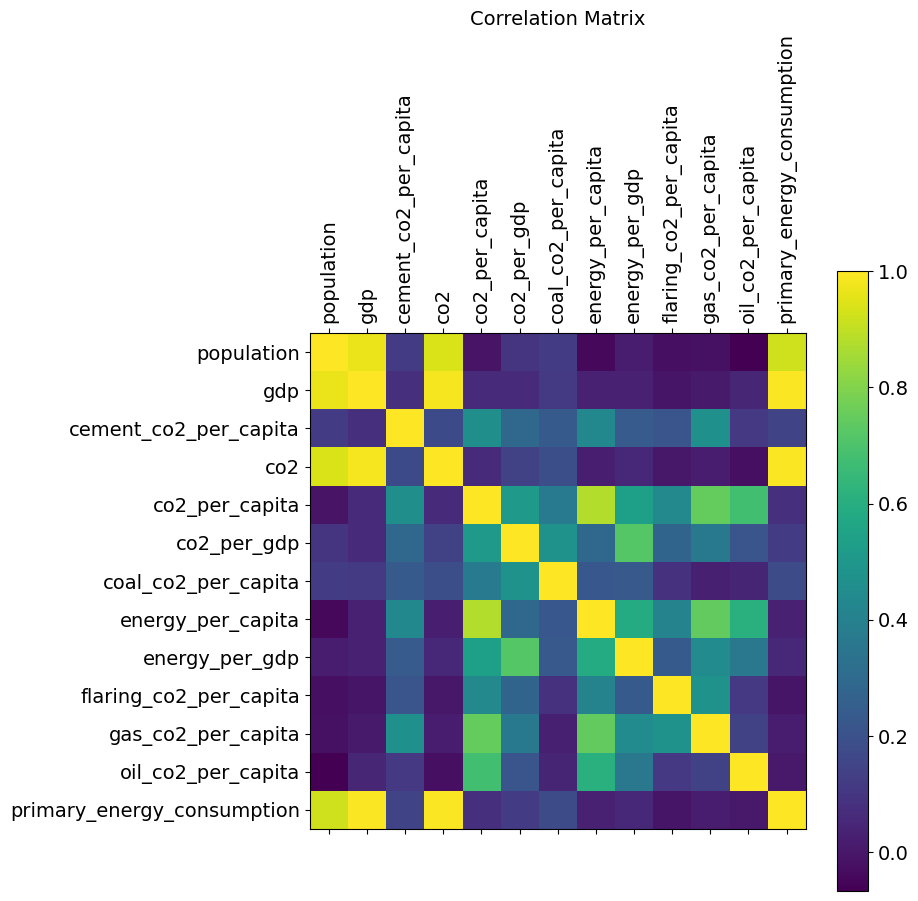

In [16]:
# Creating a correlation heatmap

corr_figure = plt.figure(figsize=(8, 8)) # Size of the figure
plt.matshow(df_sub.corr(), fignum=corr_figure.number) # Type of plot, correlation heatmap
plt.xticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14, rotation=90) # x axis labels
plt.yticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14) # y axis labels
corr_cb = plt.colorbar() # add a colorbar
corr_cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

### This gives us some information, but the values of the correlation coefficients are missing. Therefore, I'm going to create the correlation heatmap using seaborn.

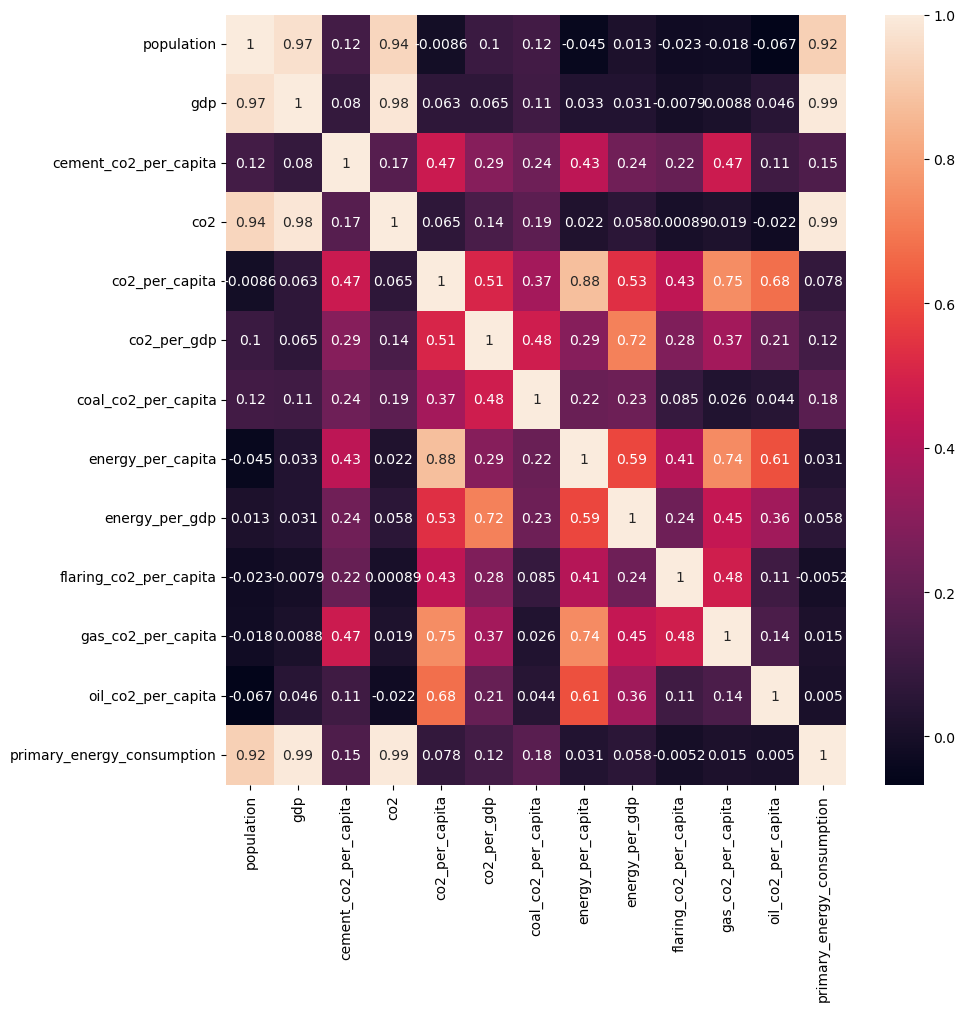

In [17]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

 This looks much better! According to this heatmap, relationships are represented with the following colors: 
* **Very Strong** : Pink (the lightest color)  
* **Fairly Strong**: Orange
* **Moderate**: Red
* **Weak**: Purple
* **no relationship at all**: Black

So based on the heatmap:

**population:** 
* very strong relationship with: - gdp, - co2, - primary_energy_consumption 

**gdp:** 
* very strong relationship with: - population, - co2, - primary_energy_consumption 

**cement_co2_per_capita:** 
* moderate relationship with: - co2, - energy_per_capita, gas_co2_per_capita
* weak relationship with: - co2, - co2_per_gdp, - energy_per_gdp, - flaring_co2_per_capita

**co2:** 
* very strong relationship with: - population, - gdp, - primary_energy_consumption 
* weak relationship with: - cement_co2_per_capita, - co2_per_gdp, - coal_co2_per_capita
         
**co2_per_capita:** 
* very strong relationship with: - energy_per_capita
* fairly strong relationship with: - gas_co2_per_capita, - oil_co2_per_capita
* moderate relationship with: - cement_co2_per_capita, - co2_per_gdp, - energy_per_gdp, - flaring_co2_per_capita, 
* moderate to weak relationship with: - coal_co2_per_capita
                    
**co2_per_gdp:** 
* fairly strong relationship with: - energy_per_gdp
* moderate relationship with: - co2_per_capita, - coal_co2_per_capita
* moderate to weak relationship with: - cement_co2_per_capita, - energy_per_capita, - flaring_co2_per_capita, 
                                      - gas_co2_per_capita, - oil_co2_per_capita

**coal_co2_per_capita:** 
* moderate relationship with: - co2_per_gdp
* weak to moderate relationship with: - cement_co2_per_capita, - co2, - co2_per_capita, - energy_per_capita, - energy_per_gdp

**energy_per_capita:** 
* very strong relationship with: - co2_per_capita
* fairly strong relationship with: - energy_per_gdp, - gas_co2_per_capita, - oil_co2_per_capita
* moderate to weak relationship with: - cement_co2_per_capita, - co2_per_gdp, - coal_co2_per_capita, - flaring_co2_per_capita

**energy_per_gdp:** 
* fairly strong relationship with: - co2_per_gdp
* moderate relationship with: - co2_per_capita, - energy_per_capita, - gas_co2_per_capita
* moderate to weak relationship with: - cement_co2_per_capita, - coal_co2_per_capita,- flaring_co2_per_capita,
                                      - oil_co2_per_capita

**flaring_co2_per_capita:** 
* moderate relationship with: - co2_per_capita, - energy_per_capita, - gas_co2_per_capita

**gas_co2_per_capita:** 
* fairly strong relationship with: - co2_per_capita, - energy_per_capita 
* moderate relationship with: - cement_co2_per_capita, - energy_per_gdp, - flaring_co2_per_capita
* moderate to weak relationship with: - co2_per_gdp

**oil_co2_per_capita:** 
* fairly strong relationship with: - co2_per_capita, - energy_per_capita
* moderate to weak relationship with: - energy_per_gdp
* weak relationship with: - cement_co2_per_capita, - co2_per_gdp, - flaring_co2_per_capita, - gas_co2_per_capita

**primary_energy_consumption:** 
* very strong relationship with: -  population, - gdp, - co2
* weak relationship with: - cement_co2_per_capita, - co2_per_gdp, - coal_co2_per_capita
 
 It makes sense that you would assume that there is a positive relationship between the co2 emissions for the different fuel or industry types (cement, coal, flaring, gas, oil) with one another and with the total and per capita co2 emissions. Also not surprising is that co2_per_gdp and energy_per_gdp only have a moderate relationship with one another and not with the other variables since they are both "per gdp". 
                                
Based on the results above, I think the following relationships sound promising for the analysis and should be investigated further:



* population and gdp
* population and co2
* population and primary_energy_consumption
* gdp and co2
* gdp and primary_energy_consumption
* co2 and primary_energy_consumption
* co2 per capita and energy_per_capita
* co2_per_gdp and energy_per_gdp
* energy_per_capita and cement_co2_per_capita
* co2_per_gdp and coal_co2_per_capita
* energy_per_capita and coal_co2_per_capita
* energy_per_capita and flaring_co2_per_capita
* energy_per capita and gas_co2_per_capita
* energy_per_capita and oil_co2_per_capita


## 4.3 Scatterplots

#### Some variables have a high correlation coefficient. But to find out if the correlation is functional, we have to find out if the correlation is linear. If it is linear, it means that the variables can have an impact on one another.

### 4.3.1 population and gdp

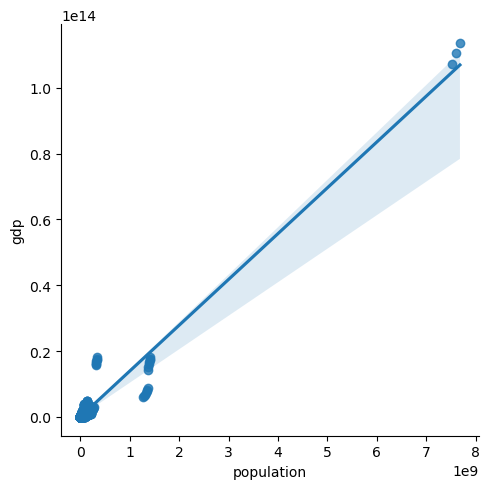

In [18]:
# Look at the correlation between population and gdp

scatter_gdp_pop = sns.lmplot(x = 'population', y = 'gdp', data = df_sub)

#### The scatterplot shows a upward trend with some outliers, mostly at the lower part of the graph. In general, you can say the larger the population, the higher the GDP. This makes sense since you expect the more people there are, the more people can contribute to the GDP. Nevertheless, there is not a perfectly linear relationship between population and GDP. 

### 4.3.2 population and total co2 emissions

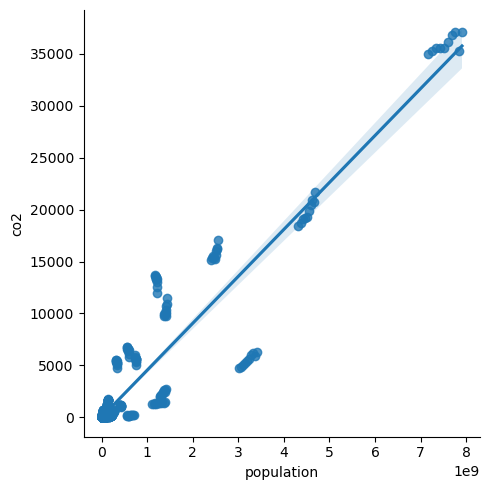

In [19]:
# Look at the correlation between population and total co2 emissions

scatter_co2_pop = sns.lmplot(x = 'population', y = 'co2', data = df_sub)

#### The scatterplot shows a upward trend with some outliers. Outliers are mostly in the first half of the graph. This means that not every country with a low population also has low co2 emissions. In the middle of the graph the values are the closest to the trendline, meaning that countries with a medium population also seem to produce medium co2 emissions. At the top of the graph you can see that the countries with the highest population also have the highest co2 emissions. Therefore,  I would consider the relationship between these two variables as linear, but weak. There is a relationship between population and total co2 emission, but there are most likely also other factors involved.

### 4.3.3 population and primary energy consumption

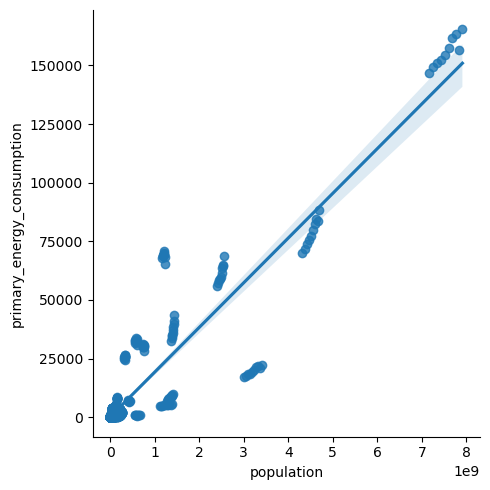

In [20]:
# Look at the correlation between population and primary energy consumption

scatter_pop_cons = sns.lmplot(x = 'population', y = 'primary_energy_consumption', data = df_sub)

#### This graph looks similar to the graph above. There is an upward trend, but there are a lot of outliers at the bottom of the graph, while values are closer to the trendline in the middle and top of the graph suggesting that there is a weak linear relationship between population and primary energy consumption. This makes sense since growing populations consume more energy.

### 4.3.4 gdp and total co2 emissions

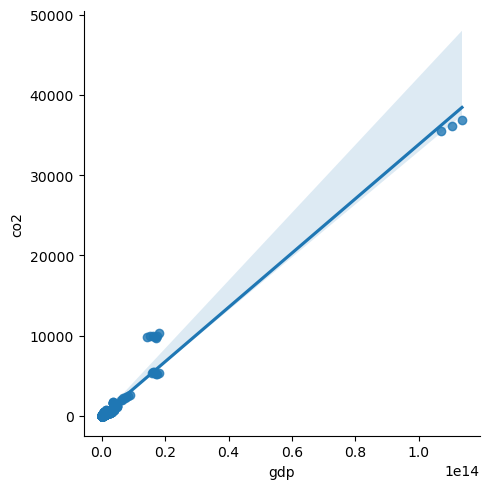

In [21]:
# Look at the correlation between gdp and total co2 emissions

scatter_co2_gdp = sns.lmplot(x = 'gdp', y = 'co2', data = df_sub)

#### The scatterplot shows a pretty linear upward trend with some outliers. So the higher the gdp, the higher the total co2 emissions. This makes sense since you expect the more industries a country has that contribute to the gdp, the higher the total co2 emissions from these industries are.


### 4.3.5 gdp and primary energy consumption

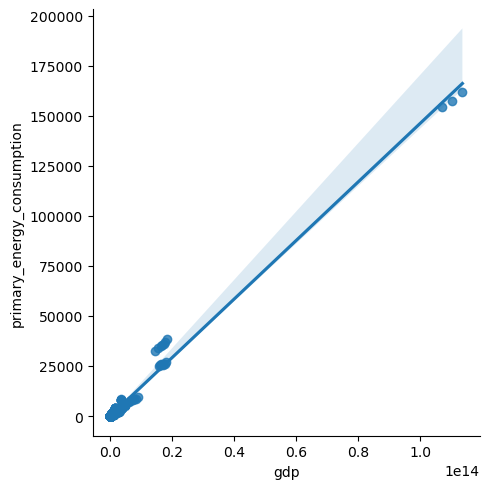

In [22]:
# Look at the correlation between gdp and primary energy consumption

scatter_gdp_cons = sns.lmplot(x = 'gdp', y = 'primary_energy_consumption', data = df_sub)

#### The scatterplot shows a linear upward trend with a few outliers. So the higher the gdp, the higher the primary energy consumption. This makes sense since you expect countries with a high gdp to have more industries which automatically contribute to a higher energy consumption.

### 4.3.6 total co2 emissions and primary energy consumption

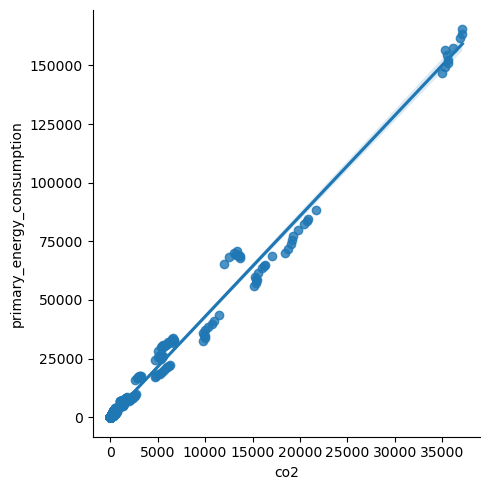

In [23]:
# Look at the correlation between total co2 emissions and primary energy consumption

scatter_co2_cons = sns.lmplot(x = 'co2', y = 'primary_energy_consumption', data = df_sub)

#### The scatterplot shows a pretty linear upward trend with some outliers. So the higher the primary energy consumption, the higher the total co2 emissions. This makes sense since you expect that high co2 emissions are a product of high energy consumption, meaning high energy consumption leads to pollution.

### 4.3.7 co2 emissions per capita and energy consumption per capita

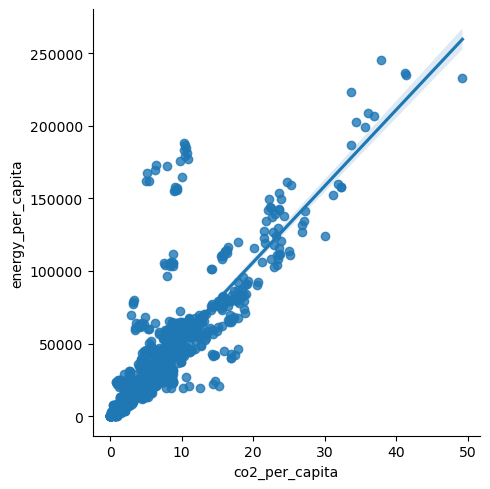

In [24]:
# Look at the correlation between co2 emissions per capita and energy consumption per capita

scatter_co2_cap_cons_cap = sns.lmplot(x = 'co2_per_capita', y = 'energy_per_capita', data = df_sub)

#### The scatterplot shows a upward trend with outliers. At the bottom half of the plot the values are tightly clustered around the trendline, meaning low energy consumption in most cases goes along with low co2 emissions. There are also values close to the trendline at the middle and top of the graph, but there are also plenty of outliers. In general, because of the amount of outliers there is only a weak linear relationship between co2 emissions per capita and energy consumption per capita is. Other contributing factors most likely play a role.

### 4.3.8 co2 per gdp and energy per gdp

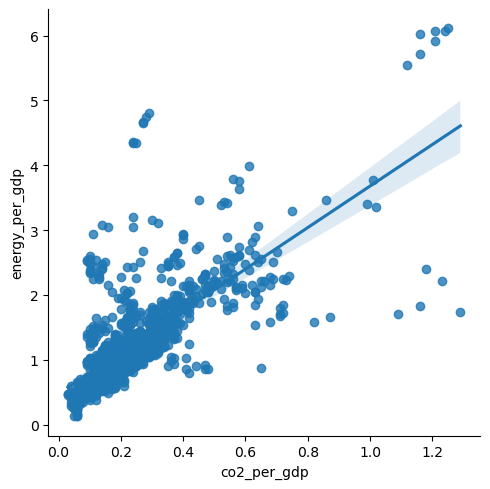

In [25]:
# Look at the correlation between co2 emissions per gdp and primary energy consumption per gdp

scatter_co2_gdp_cons_gdp = sns.lmplot(x = 'co2_per_gdp', y = 'energy_per_gdp', data = df_sub)

#### There are a lot of outliers all over the graph and most values are pretty far from the trendline at the middle and top. It seems that there only is a weak linear relationship between co2 per gdp and enery per gdp.

### 4.3.9 energy consumption per capita and cement_co2 per capita

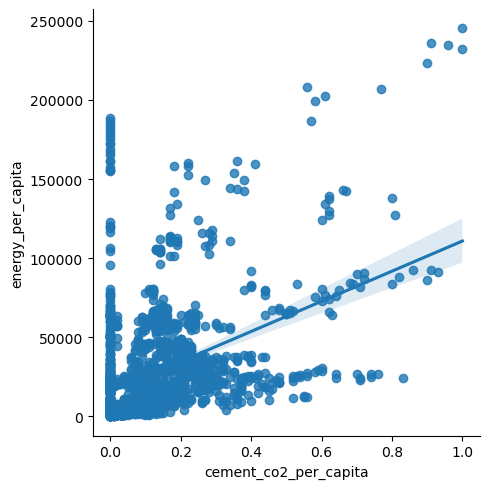

In [26]:
# Look at the correlation between co2 emissions from cement per capita and primary energy consumption per capita

scatter_cons_cap_cement_cap = sns.lmplot(x = 'cement_co2_per_capita', y = 'energy_per_capita', data = df_sub)

#### The graph shows an upward trend with several outliers. Only at the very bottom of the graph the values are clustered tightly around the trendline, there are some values close to the trendline at middle, but at the top of the graph the values are further from the trendline. Therefore, this relationship is not linear and other factors are involved.

### 4.3.10 co2_per_gdp and coal_co2_per_capita

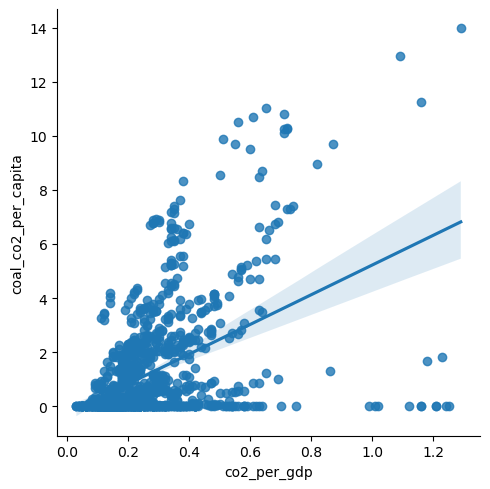

In [27]:
# Look at the correlation between co2 emissions per gdp and co2 emissions from coal per capita 

scatter_co2_gdp_coal_cap = sns.lmplot(x = 'co2_per_gdp', y = 'coal_co2_per_capita', data = df_sub)

#### The scatterplot suggests that there is no linear relationship between coal_co2 per capita and co2 per gdp. The values are only close to the trendline at the bottom of the graph and a few at the middle. There are a lot of outliers. 

### 4.3.11 energy consumption per capita and coal_co2 per capita

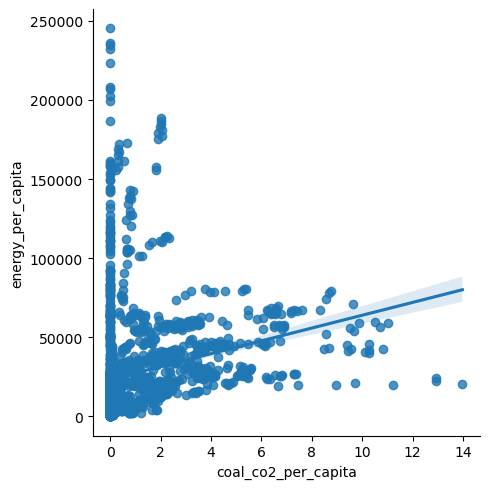

In [28]:
# Look at the correlation between co2 emissions from coal per capita and primary energy consumption per capita

scatter_cons_cap_coal_cap = sns.lmplot(x = 'coal_co2_per_capita', y = 'energy_per_capita', data = df_sub)

#### This graph looks similar than the graph above, suggesting the involvement of other factors. 

### 4.3.12 energy consumption per capita and flaring co2 per capita

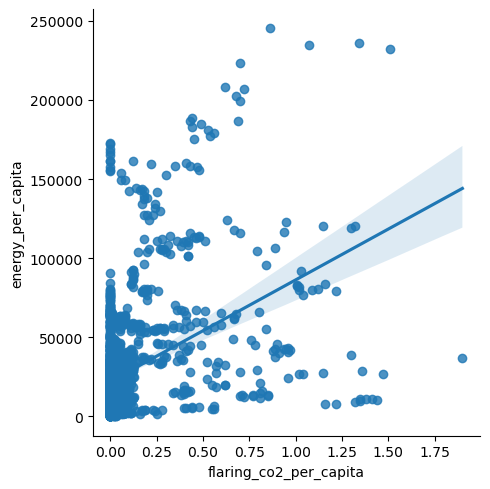

In [29]:
# Look at the correlation between co2 emissions from flaring per capita and primary energy consumption per capita

scatter_cons_cap_flaring_cap = sns.lmplot(x = 'flaring_co2_per_capita', y = 'energy_per_capita', data = df_sub)

#### The scatterplot shows a upward trend with outliers. At the bottom and middle some values are clustered tightly around the trendline, but there are plenty of outliers all over the graph which suggests that there is no linear relationship  between energy per capita and flaring co2 per capita.

### 4.3.13 energy consumption per capita and gas_co2 per capita

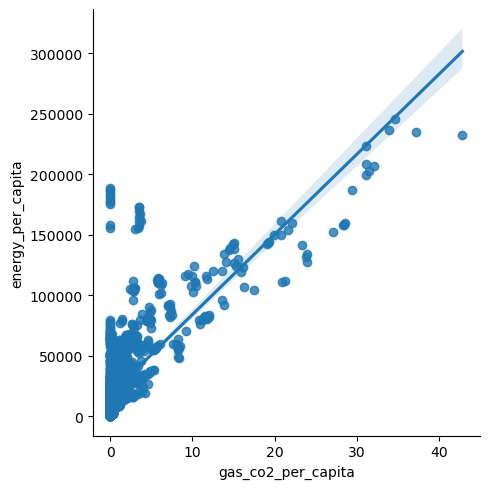

In [30]:
# Look at the correlation between co2 emissions from gas per capita and primary energy consumption per capita

scatter_cons_cap_gas_cap = sns.lmplot(x = 'gas_co2_per_capita', y = 'energy_per_capita', data = df_sub)

#### The scatterplot shows an upward trend. There are some values clustered around the trendline at the bottom, middle and top of the graph, but there are also outliers. In general, you can say that the higher the primary energy consumption per capita, the higher the co2 emissions from gas per capita. Nevertheless, because of the number of outliers the relationship does not seem to be perfectly linear and some other factors seem to be involved. 

### 4.3.14 energy consumption per capita and oil_co2 per capita

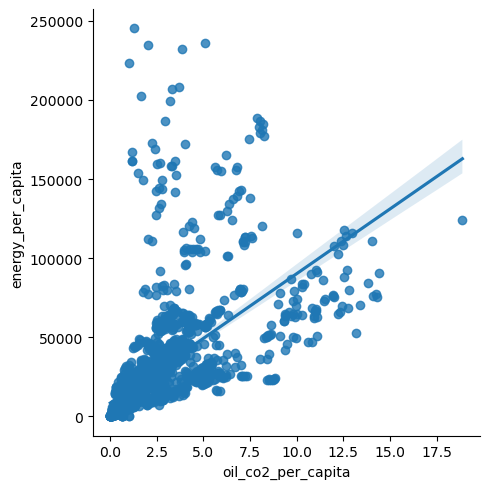

In [31]:
# Look at the correlation between co2 emissions from oil per capita and primary energy consumption per capita

scatter_cons_cap_oil_cap = sns.lmplot(x = 'oil_co2_per_capita', y = 'energy_per_capita', data = df_sub)

#### The scatterplot shows an upward trend. At the bottom and middle of the graph, there are some vlaues clustered around the tendline but there are plenty of outliers. Therefore, this is not a linear relationship. 

### 4.3.15 Summary results scatterplots
* **population and gdp:** weak linear relationship
* **population and total co2 emissions:** weak linear relationship
* **population and primary energy consumption:** weak linear relationship
* **gdp and total co2 emissions:** pretty linear relationship
* **gdp and primary energy consumption:** pretty linear relationship
* **total co2 emissions and primary energy consumption:** pretty linear relationship
* **co2 emissions per capita and energy consumption per capita:** weak linear relationship
* **co2 per gdp and energy per gdp:** weak linear relationship
* **energy consumption per capita and cement_co2 per capita:** non- linear relationship
* **co2_per_gdp and coal_co2_per_capita:** non-linear relationship
* **energy consumption per capita and flaring co2 per capita:** non-linear relationship
* **energy consumption per capita and gas_co2 per capita:** weak linear relationship
* **energy consumption per capita and oil_co2 per capita:** non-linear relationship


## 4.4 Pair plots

### In this section we create some pair plots. We will use the same dataframe but we will exclude co2_per_gdp and energy_per_gdp, cement_co2_per_capita, coal_co2_per_capita, flaring_co2_per_capita, gas_co2_per_capita and oil_co2_per_capita.

In [32]:
# Create a dataframe without co2_per_gdp and energy_per_gdp, cement_co2_per_capita, coal_co2_per_capita, flaring_co2_per_capita, gas_co2 and oil_co2_per_capita to make the pair plot more clear and less cluttered

df_sub_pair = df_sub[['population', 'gdp', 'co2', 'co2_per_capita', 'energy_per_capita', 'primary_energy_consumption']]

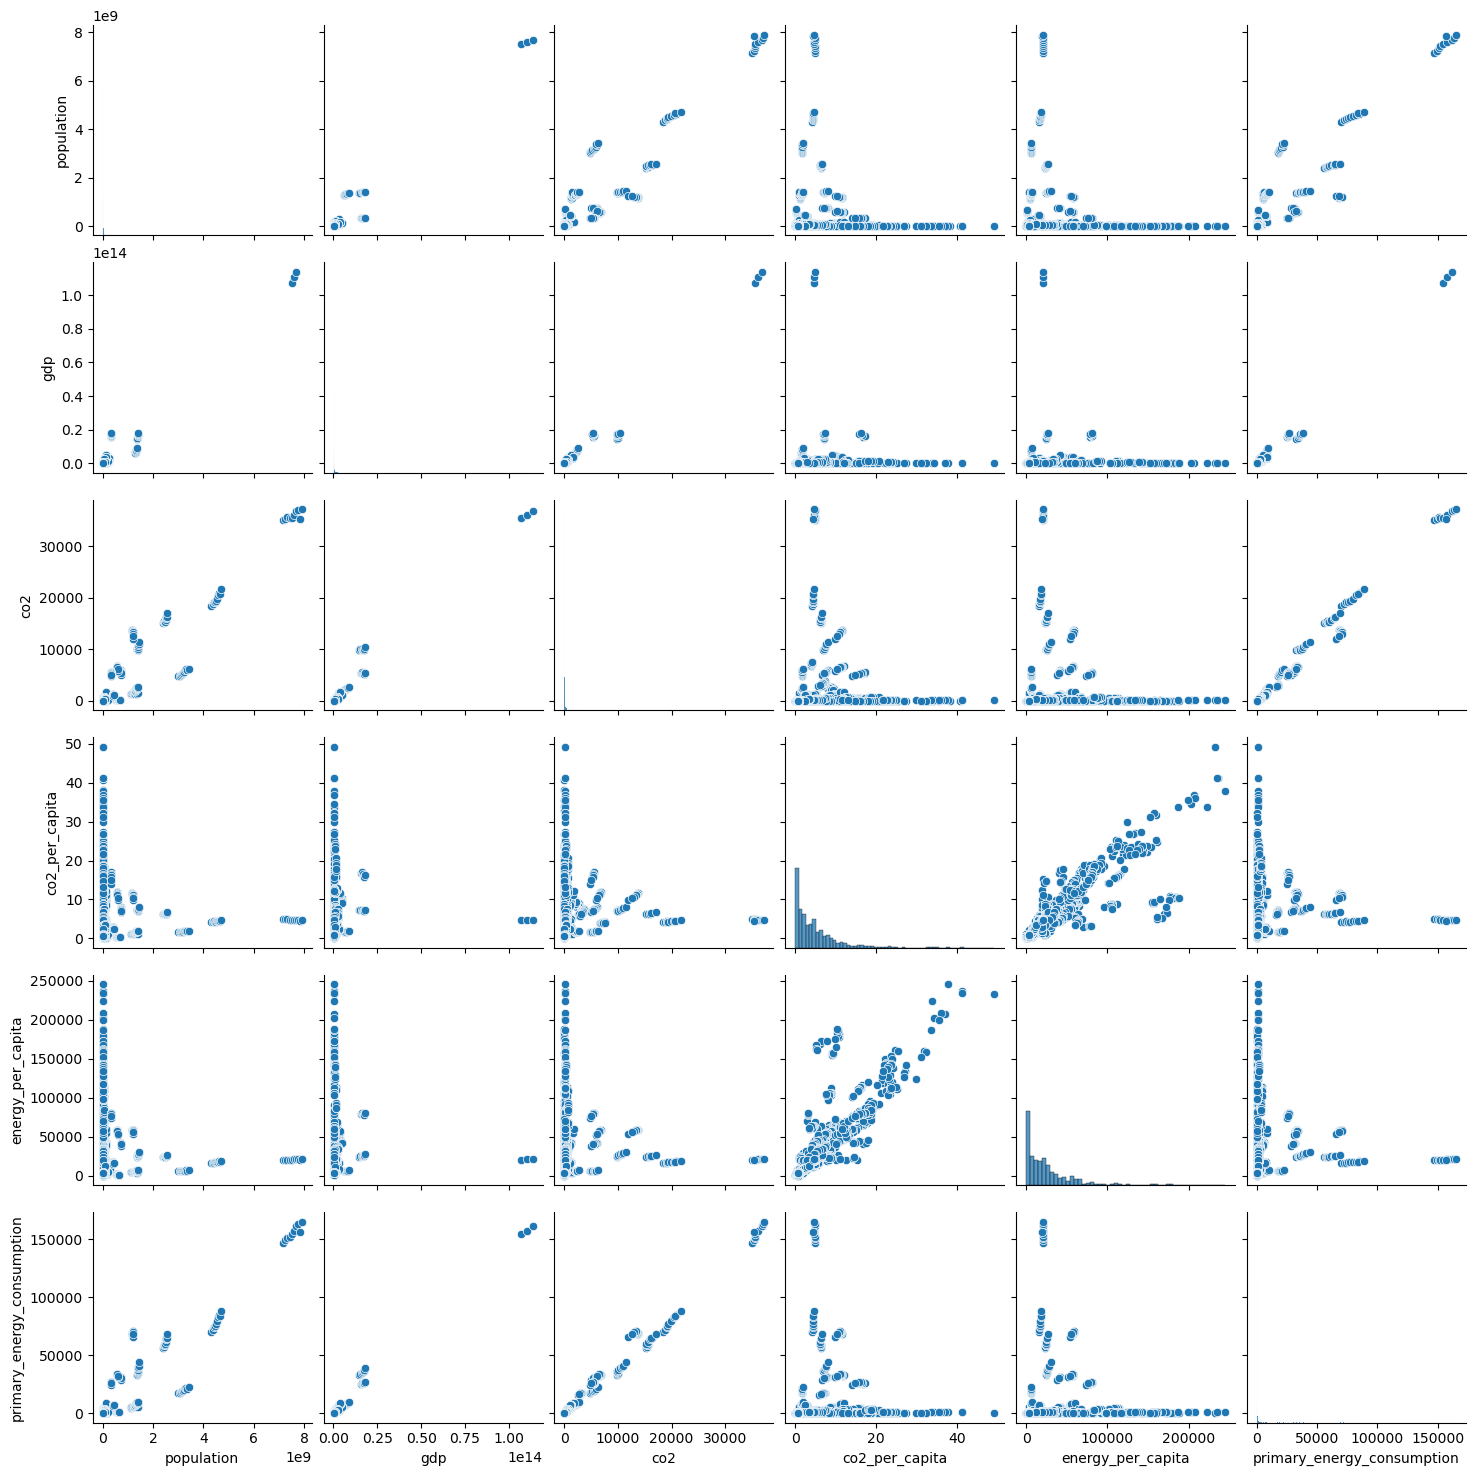

In [33]:
# Create the pair plot

pair = sns.pairplot(df_sub_pair)

####  I already created and investigated the majority of scatterplots reproduced here, but what is off is that the histograms are basically not visible which means the data seems to be skewed. This needs to be investigated further.

<AxesSubplot:xlabel='population', ylabel='Count'>

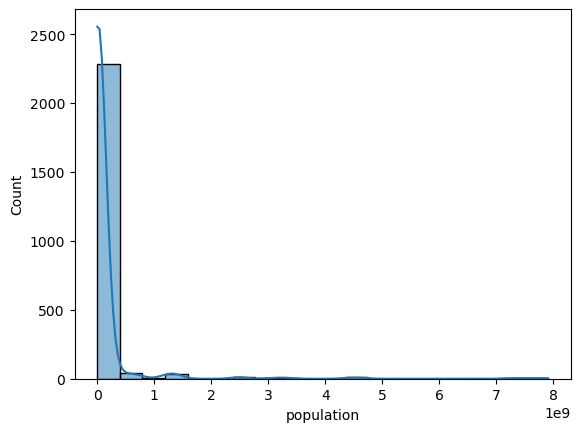

In [34]:
# Create a histogram for the population column

sns.histplot(df_sub_pair['population'], bins = 20, kde = True)

#### Because of "outliers", data is so spread that there are basically 15 bins that are not visible. To investigate further , I will create another subset that excludes the highest values of population.

In [35]:
# Create a new dataset to investigate

df_sub_pair_test_pop = df_sub_pair.loc[df_sub_pair['population'] < 100000]

<AxesSubplot:xlabel='population', ylabel='Count'>

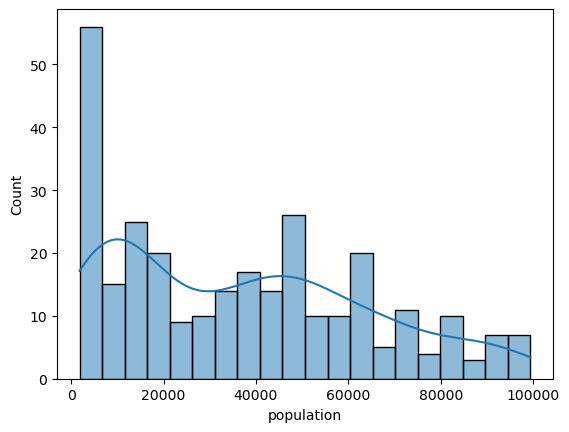

In [36]:
sns.histplot(df_sub_pair_test_pop['population'], bins = 20, kde = True)

#### This makes more sense. The distribution is heavily right skewed and most of the data seem to be clustered around low values. This is most likely also the case for the other variables.

## 4.5 Categorical plots

### 4.5.1 Create a categorical variable for total co2 emissions , that splits the "co2" column into different categories.

<AxesSubplot:xlabel='co2', ylabel='Count'>

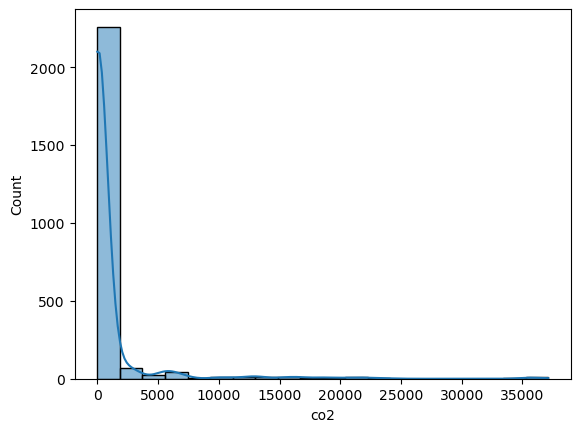

In [40]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the co2 emission ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df_co2_recent['co2'], bins = 20, kde = True)

#### Outliers make it difficult to see the distribution. Therefore, I create a new dataset to check the actual distribution

In [41]:
df_co2_recent_test_co2 = df_co2_recent.loc[df_co2_recent['co2'] < 2000]

<AxesSubplot:xlabel='co2', ylabel='Count'>

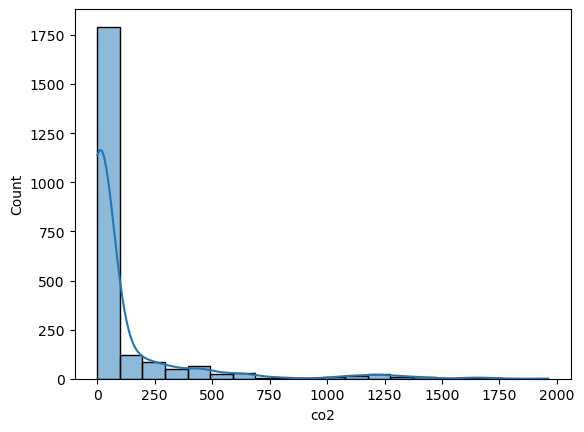

In [45]:
# Create the histogram with the new dataframe

sns.histplot(df_co2_recent_test_co2['co2'], bins = 20, kde = True)

#### According to the histogram, the majority of values falls under 100, a low value.
#### Therefore, I will create categories using the following criteria:

* if <= 100 = Low
* if > 100 and <= 250 = Medium
* if > 250 = High

#### Knowing the real distribution now, the new variable on the df_co2_recent dataframe can be created.

In [40]:
# Create the first category

df_co2_recent.loc[df_co2_recent['co2'] <= 100, 'co2_category'] = 'Low'

In [41]:
# Create the second category

df_co2_recent.loc[(df_co2_recent['co2'] > 100) & (df_co2_recent['co2'] <= 250), 'co2_category'] = 'Medium'

In [42]:
# Create the last category

df_co2_recent.loc[df_co2_recent['co2'] > 250, 'co2_category'] = 'High'

In [43]:
# Check the results

df_co2_recent.head(10)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_per_capita,co2_per_gdp,coal_co2,coal_co2_per_capita,cumulative_cement_co2,cumulative_co2,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_oil_co2,energy_per_capita,energy_per_gdp,flaring_co2,flaring_co2_per_capita,gas_co2,gas_co2_per_capita,oil_co2,oil_co2_per_capita,primary_energy_consumption,share_global_cement_co2,share_global_co2,share_global_coal_co2,share_global_cumulative_cement_co2,share_global_cumulative_co2,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_oil_co2,share_global_flaring_co2,share_global_gas_co2,share_global_oil_co2,co2_category
0,Afghanistan,2012,AFG,30466484.0,5.916690e+10,0.03,0.0,10.04,-1.80,-15.23,0.33,0.17,3.12,0.10,2.12,125.39,25.32,0.0,17.77,74.22,1419.91,0.73,0.0,0.0,0.31,0.01,6.57,0.22,43.26,0.0,0.03,0.02,0.01,0.01,0.00,0.04,0.01,0.02,0.0,0.0,0.06,Low
1,Afghanistan,2013,AFG,31541216.0,6.299370e+10,0.04,0.0,9.25,-0.78,-7.82,0.29,0.15,3.33,0.10,2.16,134.64,28.64,0.0,18.07,79.82,1156.86,0.58,0.0,0.0,0.30,0.01,5.59,0.18,36.49,0.0,0.03,0.02,0.01,0.01,0.00,0.04,0.01,0.02,0.0,0.0,0.05,Low
2,Afghanistan,2014,AFG,32716214.0,6.434611e+10,0.03,0.0,9.17,-0.08,-0.87,0.28,0.14,3.71,0.11,2.19,143.81,32.35,0.0,18.34,84.98,1024.02,0.52,0.0,0.0,0.27,0.01,5.16,0.16,33.50,0.0,0.03,0.02,0.01,0.01,0.00,0.04,0.01,0.02,0.0,0.0,0.04,Low
3,Afghanistan,2015,AFG,33753500.0,6.278339e+10,0.04,0.0,9.79,0.62,6.77,0.29,0.16,2.84,0.08,2.23,153.60,35.19,0.0,18.62,91.60,1096.54,0.59,0.0,0.0,0.28,0.01,6.62,0.20,37.01,0.0,0.03,0.02,0.01,0.01,0.00,0.04,0.01,0.02,0.0,0.0,0.06,Low
4,Afghanistan,2016,AFG,34636212.0,6.429743e+10,0.08,0.0,9.07,-0.72,-7.39,0.26,0.14,2.88,0.08,2.30,162.67,38.07,0.0,18.94,97.40,994.86,0.54,0.0,0.0,0.32,0.01,5.79,0.17,34.46,0.0,0.03,0.02,0.01,0.01,0.00,0.04,0.01,0.02,0.0,0.0,0.05,Low
5,Afghanistan,2017,AFG,35643420.0,6.875280e+10,0.04,0.0,9.87,0.80,8.83,0.28,0.14,3.45,0.10,2.35,172.54,41.52,0.0,19.24,103.47,1027.30,0.53,0.0,0.0,0.30,0.01,6.08,0.17,36.62,0.0,0.03,0.02,0.01,0.01,0.01,0.04,0.01,0.02,0.0,0.0,0.05,Low
6,Afghanistan,2018,AFG,36686788.0,6.759497e+10,0.06,0.0,10.82,0.95,9.63,0.30,0.16,3.85,0.10,2.40,183.36,45.37,0.0,19.53,110.10,1144.53,0.62,0.0,0.0,0.29,0.01,6.62,0.18,41.99,0.0,0.03,0.03,0.01,0.01,0.01,0.04,0.01,0.02,0.0,0.0,0.05,Low
7,Afghanistan,2019,AFG,37769496.0,NaN,0.04,0.0,11.08,0.26,2.44,0.29,NaN,3.96,0.10,2.44,194.44,49.32,0.0,19.78,116.94,952.46,NaN,0.0,0.0,0.25,0.01,6.84,0.18,35.97,0.0,0.03,0.03,0.01,0.01,0.01,0.03,0.01,0.02,0.0,0.0,0.06,Low
8,Afghanistan,2020,AFG,38972236.0,NaN,0.06,0.0,11.68,0.60,5.42,0.30,NaN,4.15,0.11,2.50,206.12,53.47,0.0,20.03,124.16,NaN,NaN,0.0,0.0,0.25,0.01,7.22,0.18,NaN,0.0,0.03,0.03,0.01,0.01,0.01,0.03,0.01,0.02,0.0,0.0,0.06,Low
9,Afghanistan,2021,AFG,40099460.0,NaN,0.01,0.0,11.87,0.19,1.65,0.30,NaN,4.20,0.10,2.52,217.99,57.68,0.0,20.27,131.58,NaN,NaN,0.0,0.0,0.24,0.01,7.42,0.18,NaN,0.0,0.03,0.03,0.01,0.01,0.01,0.03,0.01,0.02,0.0,0.0,0.06,Low


In [44]:
# Check the frequencies for the "co2_category" column

df_co2_recent['co2_category'].value_counts(dropna = False)

Low       1798
High       521
Medium     161
NaN        120
Name: co2_category, dtype: int64

#### This reflects the distributions seen in the histogram.

#### Now the categorical plot can be created using the primary energy consumption.

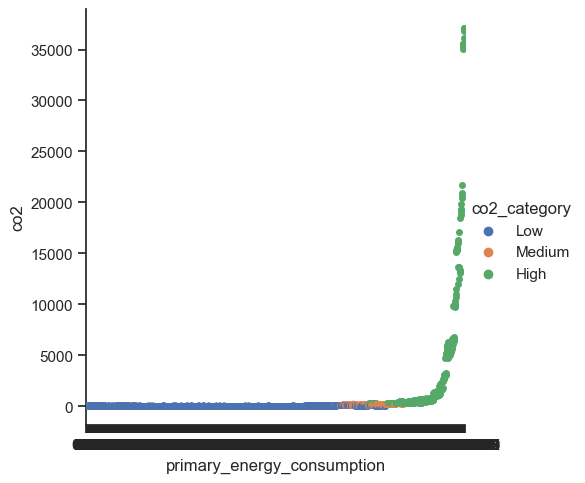

In [45]:
# Create a categorical plot

sns.set(style="ticks")
categorical = sns.catplot(x="primary_energy_consumption", y="co2", hue="co2_category", data=df_co2_recent)

#### Low emissions are colored in blue, medium emissions in orange and high emissions in green. We can see on the far left that when the primary energy consumption is low, there are no green dots at all. There are no blue dots when the energy consumption is high. This confirms that high co2 emissions are a product of high energy consumption.

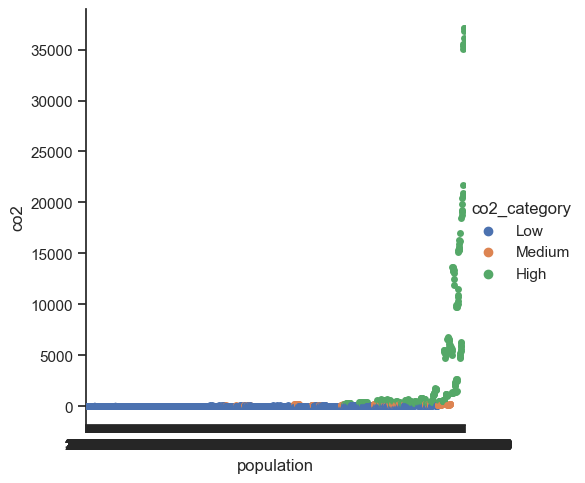

In [46]:
# Create a categorical plot

categorical_2 = sns.catplot(x="population", y="co2", hue="co2_category", data=df_co2_recent)

#### This chart shows that as the population reaches a certain number the emissions become "medium" and "high" (around the middle of x axis). You can also see that it is possible to maintain low emissions despite a high population.

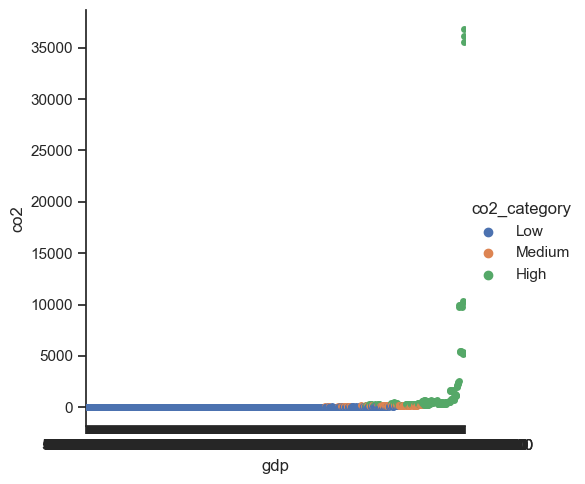

In [47]:
# Create a categorical plot

categorical_3 = sns.catplot(x="gdp", y="co2", hue="co2_category", data=df_co2_recent)

#### This plots shows that high co2 emissions co-ocurr with a high gdp. This makes sense since industries that contribute to a high gdp often also lead to pollution. 

### 4.5.2 Create a categorical variable for co2 emissions per capita , that splits the "co2_per_capita" column into different categories.

<AxesSubplot:xlabel='co2_per_capita', ylabel='Count'>

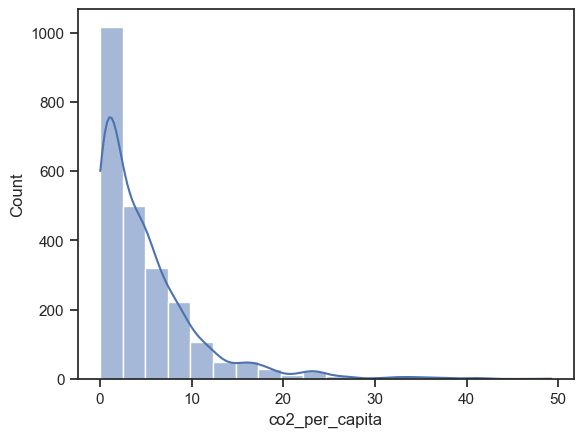

In [48]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the co2 emission ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df_co2_recent['co2_per_capita'], bins = 20, kde = True)

### According to the histogram, the majority of values falls under 5, a low value.

Therefore, I will create categories using the following criteria:

* if <= 5 = Low
* if > 5 and <= 10 = Medium
* if > 10 = High

### Knowing the real distribution now, the new variable on the df_co2_recent dataframe can be created.

In [49]:
# Create the first category

df_co2_recent.loc[df_co2_recent['co2_per_capita'] <= 5, 'co2_per_capita_category'] = 'Low'

In [50]:
# Create the second category

df_co2_recent.loc[(df_co2_recent['co2_per_capita'] > 5) & (df_co2_recent['co2_per_capita'] <= 20), 'co2_per_capita_category'] = 'Medium'

In [51]:
# Create the last category

df_co2_recent.loc[df_co2_recent['co2_per_capita'] > 20, 'co2_per_capita_category'] = 'High'

In [52]:
# Check the results

df_co2_recent.head(10)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_per_capita,co2_per_gdp,coal_co2,coal_co2_per_capita,cumulative_cement_co2,cumulative_co2,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_oil_co2,energy_per_capita,energy_per_gdp,flaring_co2,flaring_co2_per_capita,gas_co2,gas_co2_per_capita,oil_co2,oil_co2_per_capita,primary_energy_consumption,share_global_cement_co2,share_global_co2,share_global_coal_co2,share_global_cumulative_cement_co2,share_global_cumulative_co2,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_oil_co2,share_global_flaring_co2,share_global_gas_co2,share_global_oil_co2,co2_category,co2_per_capita_category
0,Afghanistan,2012,AFG,30466484.0,5.916690e+10,0.03,0.0,10.04,-1.80,-15.23,0.33,0.17,3.12,0.10,2.12,125.39,25.32,0.0,17.77,74.22,1419.91,0.73,0.0,0.0,0.31,0.01,6.57,0.22,43.26,0.0,0.03,0.02,0.01,0.01,0.00,0.04,0.01,0.02,0.0,0.0,0.06,Low,Low
1,Afghanistan,2013,AFG,31541216.0,6.299370e+10,0.04,0.0,9.25,-0.78,-7.82,0.29,0.15,3.33,0.10,2.16,134.64,28.64,0.0,18.07,79.82,1156.86,0.58,0.0,0.0,0.30,0.01,5.59,0.18,36.49,0.0,0.03,0.02,0.01,0.01,0.00,0.04,0.01,0.02,0.0,0.0,0.05,Low,Low
2,Afghanistan,2014,AFG,32716214.0,6.434611e+10,0.03,0.0,9.17,-0.08,-0.87,0.28,0.14,3.71,0.11,2.19,143.81,32.35,0.0,18.34,84.98,1024.02,0.52,0.0,0.0,0.27,0.01,5.16,0.16,33.50,0.0,0.03,0.02,0.01,0.01,0.00,0.04,0.01,0.02,0.0,0.0,0.04,Low,Low
3,Afghanistan,2015,AFG,33753500.0,6.278339e+10,0.04,0.0,9.79,0.62,6.77,0.29,0.16,2.84,0.08,2.23,153.60,35.19,0.0,18.62,91.60,1096.54,0.59,0.0,0.0,0.28,0.01,6.62,0.20,37.01,0.0,0.03,0.02,0.01,0.01,0.00,0.04,0.01,0.02,0.0,0.0,0.06,Low,Low
4,Afghanistan,2016,AFG,34636212.0,6.429743e+10,0.08,0.0,9.07,-0.72,-7.39,0.26,0.14,2.88,0.08,2.30,162.67,38.07,0.0,18.94,97.40,994.86,0.54,0.0,0.0,0.32,0.01,5.79,0.17,34.46,0.0,0.03,0.02,0.01,0.01,0.00,0.04,0.01,0.02,0.0,0.0,0.05,Low,Low
5,Afghanistan,2017,AFG,35643420.0,6.875280e+10,0.04,0.0,9.87,0.80,8.83,0.28,0.14,3.45,0.10,2.35,172.54,41.52,0.0,19.24,103.47,1027.30,0.53,0.0,0.0,0.30,0.01,6.08,0.17,36.62,0.0,0.03,0.02,0.01,0.01,0.01,0.04,0.01,0.02,0.0,0.0,0.05,Low,Low
6,Afghanistan,2018,AFG,36686788.0,6.759497e+10,0.06,0.0,10.82,0.95,9.63,0.30,0.16,3.85,0.10,2.40,183.36,45.37,0.0,19.53,110.10,1144.53,0.62,0.0,0.0,0.29,0.01,6.62,0.18,41.99,0.0,0.03,0.03,0.01,0.01,0.01,0.04,0.01,0.02,0.0,0.0,0.05,Low,Low
7,Afghanistan,2019,AFG,37769496.0,NaN,0.04,0.0,11.08,0.26,2.44,0.29,NaN,3.96,0.10,2.44,194.44,49.32,0.0,19.78,116.94,952.46,NaN,0.0,0.0,0.25,0.01,6.84,0.18,35.97,0.0,0.03,0.03,0.01,0.01,0.01,0.03,0.01,0.02,0.0,0.0,0.06,Low,Low
8,Afghanistan,2020,AFG,38972236.0,NaN,0.06,0.0,11.68,0.60,5.42,0.30,NaN,4.15,0.11,2.50,206.12,53.47,0.0,20.03,124.16,NaN,NaN,0.0,0.0,0.25,0.01,7.22,0.18,NaN,0.0,0.03,0.03,0.01,0.01,0.01,0.03,0.01,0.02,0.0,0.0,0.06,Low,Low
9,Afghanistan,2021,AFG,40099460.0,NaN,0.01,0.0,11.87,0.19,1.65,0.30,NaN,4.20,0.10,2.52,217.99,57.68,0.0,20.27,131.58,NaN,NaN,0.0,0.0,0.24,0.01,7.42,0.18,NaN,0.0,0.03,0.03,0.01,0.01,0.01,0.03,0.01,0.02,0.0,0.0,0.06,Low,Low


In [53]:
# Check the frequencies for the "co2_per_capita_category" column

df_co2_recent['co2_per_capita_category'].value_counts(dropna = False)

Low       1526
Medium     540
High       294
NaN        240
Name: co2_per_capita_category, dtype: int64

### This reflects the distributions seen in the histogram.

### Now the categorical plot can be created using the energy consumption per capita.

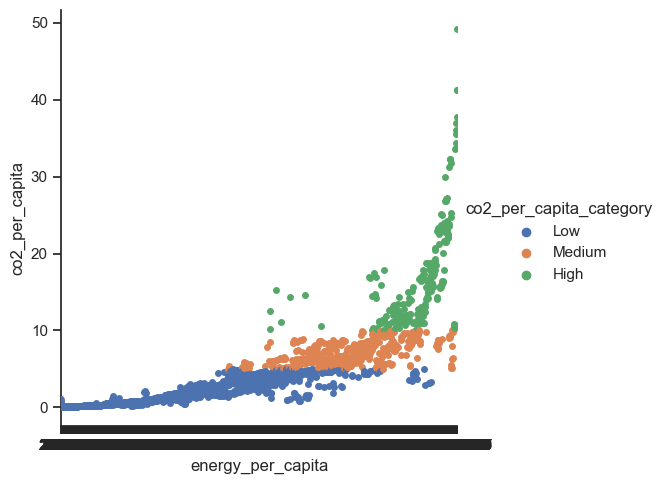

In [54]:
# Create a categorical plot

sns.set(style="ticks")
categorical_4 = sns.catplot(x="energy_per_capita", y="co2_per_capita", hue="co2_per_capita_category", data=df_co2_recent)

#### Low emissions are colored in blue, medium emissions in orange and high emissions in green. We can see on the far left that when the energy consumption per capita is low, there are no green dots at all. There are barely any blue dots when the energy consumption is high. In the middle of the graph there are mostly orange dots, but also some blue and green dots meaning that at medium energy consumption there is also a possibility of high or low co2 emissions per capita. In general, this plot confirms that high co2 emissions are a product of high energy consumption.

# 5. Key Questions

#### Here I will reply to some key questions I formulated before and that came up during the analysis:

##### -	Is there a correlation between CO2 emission and GDP?
Yes, there is a positive correlation between total CO2 emissions and GDP. The correlation coefficient is 0,98. Looking at the scatterplot you can see a linear upward trend with some outliers. Growing GDP leads to increasing co2 emissions. This makes sense since you expect the more industries a country has that contribute to the gdp, the higher the total co2 emissions from these industries are.

##### - Is there a correlation between CO2 emission and population size?

Despite that the correlation coefficient is 0,94, the relationship between total co2 emissions and population size doesn't seem to be perfectly linear. Looking at the scatterplot you can see an upward trend, but there are a lot of outliers, mostly in the lower part of the graph.This means that not every country with a low population also has low co2 emissions. The values are the closest to the trendline in the middle of the graph suggesting countries with a medium population also seem to produce medium co2 emissions. At the top of the graph the values are close to the trendline, but not directly on it. Countries with high populations in most cases have high co2 emissions. Based on this there is a relationship between population and total co2 emission, but there are most likely other factors involved.

#####  - Is there a correlation between primary energy consumption and total CO2 emissions? If yes, what kind of relationship is?

According to my analysis, there is a linear correlation between primary energy consumption and total CO2 emissions. The correlation coefficient is 0,99 and the scatterplot shows a pretty linear upward trend. The higher the primary energy consumption, the higher the total co2 emissions. This makes sense since you expect that high co2 emissions are a product of high energy consumption, meaning high energy consumption leads to pollution.

#####  - Is there a correlation between primary energy consumption per capita and CO2 emissions per capita? If yes, what kind of relationship is?

There is a weak linear correlation between primary energy consumption per capita and CO2 emissions per capita. The correlation coefficient is 0,88 showing a strong relationship between the two variables, but looking at the scatterplot it shows that there are quite some outliers suggesting that there is only a weak linear relationship and other factors are most likely involved. 

##### Is there a correlation between GDP and primary energy consumption? If yes, what kind of relationship is?

There is a correlation coefficient of 0,99 between the two variables and the scatterplot shows a linear upward trend with a few outliers. So the higher the gdp, the higher the primary energy consumption. This makes sense since you expect countries with a high gdp to have more industries which automatically contribute to a higher enery consumption.





# 6. Hypothesis

#### Based on my analysis results so far, I want to test the following research hypotheses:

CO2 emissions have been categorized into "low", "medium" and "high" for the categorical plots and I found that there is a relationship between energy consumption and CO2 emissions which leads me to the following hypothesis which can be tested for "total" and "per capita" values:

* The average energy consumption of countries with "high" CO2 emissions will be higher than the average energy consumption of  countries with "low" CO2 emissions. 

Coal is known to be responsible for the most CO2 emitted per unit of heat or energy produced, therefore I want to test the following hypothesis:

* The average coal energy consumption of countries with "high" CO2 emissions will be higher than the average coal energy consumption of countries with "low" CO2 emissions.

# 7. Saving Charts

In [55]:
corr.figure.savefig(os.path.join(path, '04. Visualizations','correlation_heatmap.png'), bbox_inches='tight')

In [56]:
scatter_gdp_pop.figure.savefig(os.path.join(path, '04. Visualizations','scatterplot_gdp_population.png'), bbox_inches='tight')

In [57]:
scatter_co2_pop.figure.savefig(os.path.join(path, '04. Visualizations','scatterplot_co2_population.png'), bbox_inches='tight')

In [58]:
scatter_pop_cons.figure.savefig(os.path.join(path, '04. Visualizations','scatterplot_population_energy_consumption.png'), bbox_inches='tight')

In [59]:
scatter_co2_gdp.figure.savefig(os.path.join(path, '04. Visualizations','scatterplot_co2_gdp.png'), bbox_inches='tight')

In [60]:
scatter_gdp_cons.figure.savefig(os.path.join(path, '04. Visualizations','scatterplot_gdp_energy_consumption.png'), bbox_inches='tight')

In [61]:
scatter_co2_cons.figure.savefig(os.path.join(path, '04. Visualizations','scatterplot_co2_energy_consumption.png'), bbox_inches='tight')

In [62]:
scatter_co2_cap_cons_cap.figure.savefig(os.path.join(path, '04. Visualizations','scatterplot_co2_capita_energy_consumption_capita.png'), bbox_inches='tight')

In [63]:
scatter_co2_gdp_cons_gdp.figure.savefig(os.path.join(path, '04. Visualizations','scatterplot_co2_gdp_energy_consumption_gdp.png'), bbox_inches='tight')

In [64]:
scatter_cons_cap_cement_cap.figure.savefig(os.path.join(path, '04. Visualizations','scatterplot_energy_consumption_capita_cement_co2_capita.png'), bbox_inches='tight')

In [65]:
scatter_co2_gdp_coal_cap.figure.savefig(os.path.join(path, '04. Visualizations','scatterplot_co2_gdp_coal_co2_capita.png'), bbox_inches='tight')

In [66]:
scatter_cons_cap_coal_cap.figure.savefig(os.path.join(path, '04. Visualizations','scatterplot_energy_consumption_capita_coal_co2_capita.png'), bbox_inches='tight')

In [67]:
scatter_cons_cap_flaring_cap.figure.savefig(os.path.join(path, '04. Visualizations','scatterplot_energy_consumption_capita_flaring_co2_capita.png'), bbox_inches='tight')

In [68]:
scatter_cons_cap_gas_cap.figure.savefig(os.path.join(path, '04. Visualizations','scatterplot_energy_consumption_capita_gas_co2_capita.png'), bbox_inches='tight')

In [69]:
scatter_cons_cap_oil_cap.figure.savefig(os.path.join(path, '04. Visualizations','scatterplot_energy_consumption_capita_oil_co2_capita.png'), bbox_inches='tight')

In [70]:
pair.figure.savefig(os.path.join(path, '04. Visualizations','pairplot.png'), bbox_inches='tight')

In [71]:
categorical.figure.savefig(os.path.join(path, '04. Visualizations','categorical_co2_energy_consumption.png'), bbox_inches='tight')

In [72]:
categorical_2.figure.savefig(os.path.join(path, '04. Visualizations','categorical_co2_population.png'), bbox_inches='tight')

In [73]:
categorical_3.figure.savefig(os.path.join(path, '04. Visualizations','categorical_co2_gdp.png'), bbox_inches='tight')

In [74]:
categorical_4.figure.savefig(os.path.join(path, '04. Visualizations','categorical_co2_capita_energy_consumption_capita.png'), bbox_inches='tight')